## Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.model_selection import train_test_split


## Parte 1

* Cargue la base de datos Lluvia_full.csv
* Codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente.
* Realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 70:30 respectivamente estratificado por la LluviaMan.
* Fije una semilla antes de obtener los indices. Para ello utilice la función set.seed(2023).

In [40]:
url1 = 'https://raw.githubusercontent.com/louisboza/DS_UC_Diplomado/main/Taller_2/scr/Lluvia_full.csv'
df = pd.read_csv(url1)

In [41]:
df.head(5)

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


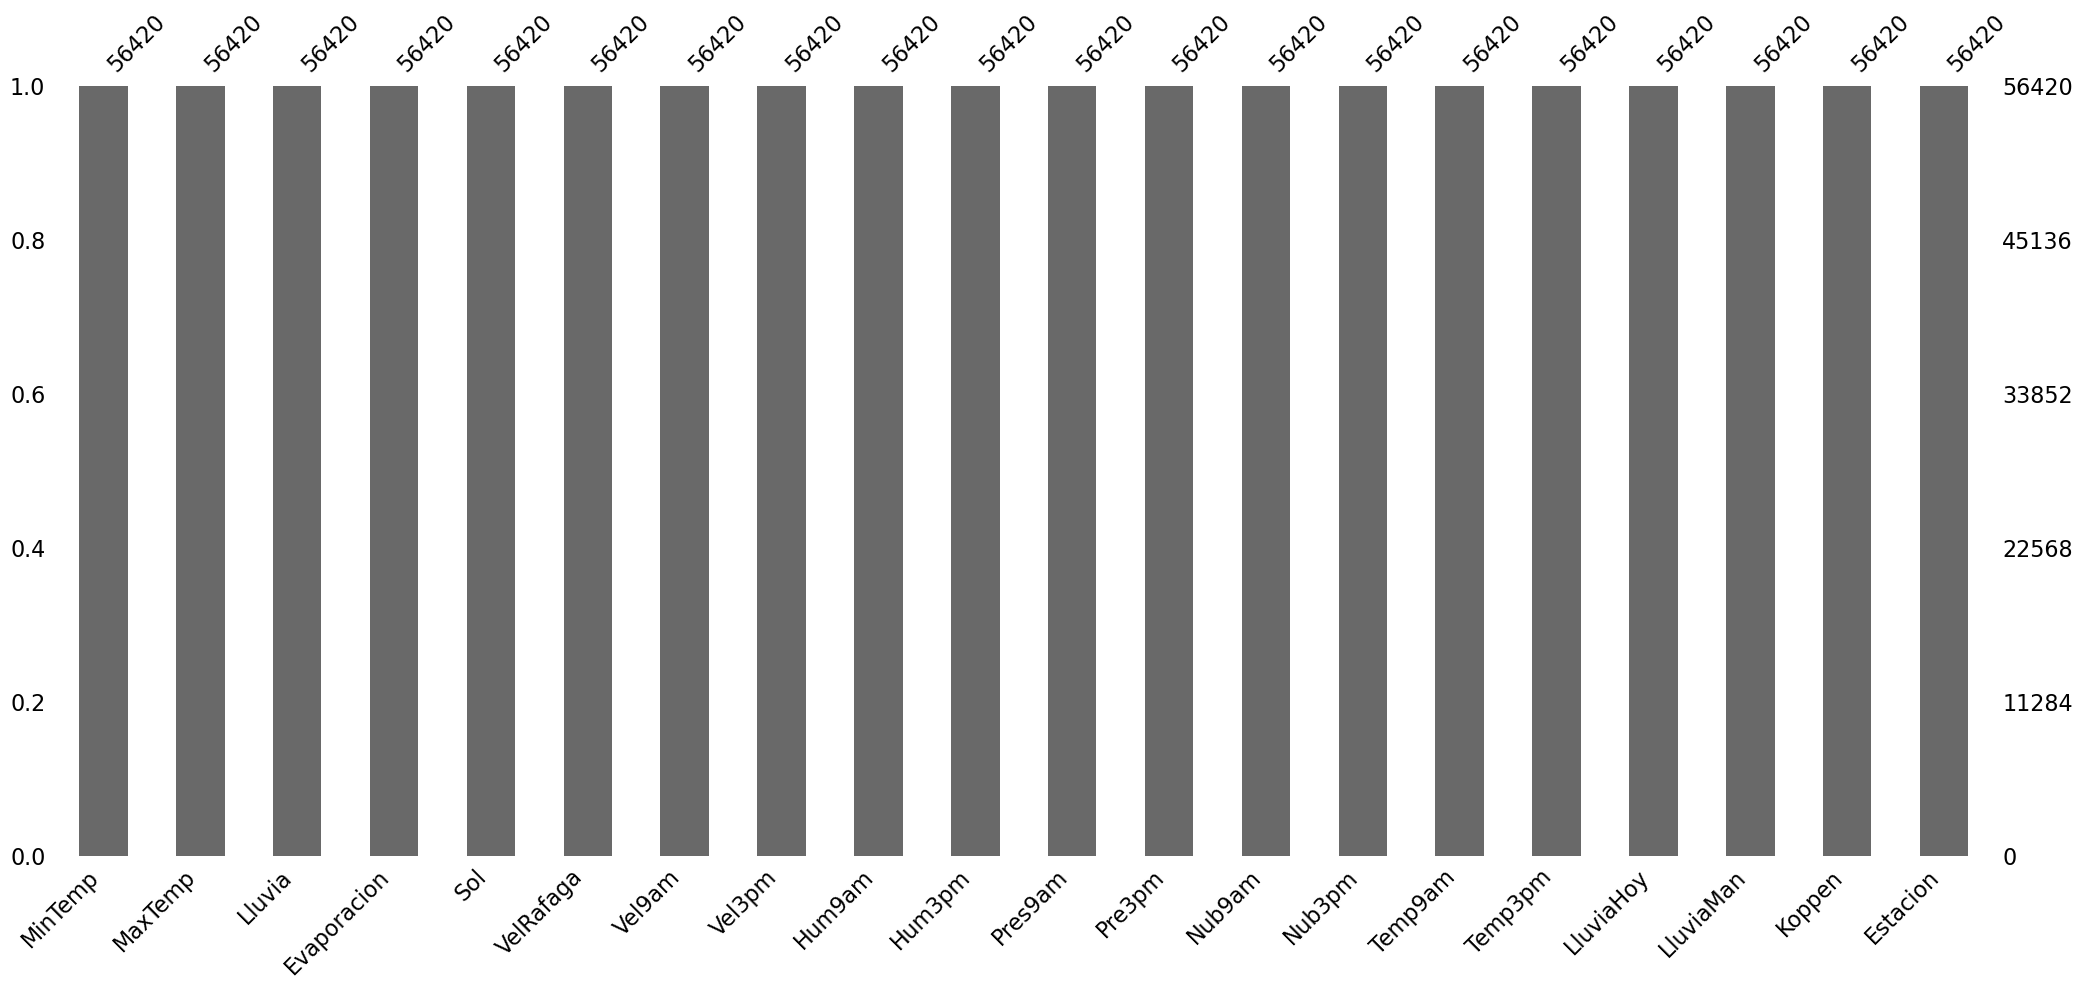

In [42]:
msno.bar(df)
plt.show();

La base se ve estable, sin valores nulos.

In [43]:
df['LluviaMan_code'] = np.where(df['LluviaMan'] == "No", 0, 1)

In [44]:
X = df.drop(['LluviaMan', 'LluviaMan_code'], axis =1)
y = df['LluviaMan_code']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023, stratify = y)

## Parte 2

1. Utilizando el set de entrenamiento, ajuste un modelo de regresión logística, SVM, árbol de clasificación y Random Forest. Para ello debe:

* Limpiar los datos - Escalar los datos numéricos. - Transformar a dummys las variables categóricas.

2. Definir la grilla de hiperparámetros a optimizar, en este caso:

SVM
* Costo

Árbol de clasificación:
* Observaciones mínimas para división.
* Costo de complejidad.
* Profundidad máxima del árbol.

Random Forest
* Número de árboles.
* Número de predictores muestreados para cada árbol.
* Observaciones mínimas para división.

3. Buscar los hiperparámetros óptimos utilizando validación cruzada optimizando la métrica de roc_auc

In [56]:
cat_var = X_train.columns[X_train.dtypes=='object']
num_var = X_train.columns[X_train.dtypes!='object']

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

onehot = OneHotEncoder()
scaler = StandardScaler()

transformer = make_column_transformer(
    (onehot, cat_var),
    (scaler, num_var),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)

transformer.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')),
                                ('standardscaler', StandardScaler(),
                                 Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [61]:
X_train_transf = pd.DataFrame(
    data = transformer.transform(X_train),
    columns= transformer.get_feature_names_out()
)

X_test_transf = pd.DataFrame(
    data = transformer.transform(X_test),
    columns= transformer.get_feature_names_out()
)


display(X_train_transf.head(10))
display(X_test_transf.head(10))

,LluviaHoy_No,LluviaHoy_Yes,Koppen_Desert,Koppen_Grassland,Koppen_Subtropical,Koppen_Temperate,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,...,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.801647,1.787281,-0.154067,0.021209,0.183075,-0.041824,-1.156446,-0.117843,0.713276,0.495574
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.043211,1.317494,-2.154512,1.308101,-0.134811,0.016322,-0.083906,0.637754,0.242551,-1.185454
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.251648,-1.031440,0.494726,1.159613,-0.149260,-0.405240,0.988634,1.393352,0.364028,0.071662
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.526956,0.260474,-0.045934,-0.275766,1.078933,0.917593,0.631120,1.015553,-0.759637,-0.571513
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-1.647121,-1.266333,0.765057,-0.424254,0.862193,0.757690,-1.156446,-1.251240,-1.488502,-0.264543
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.318518,-1.031440,-1.884181,-1.909129,0.197524,0.103542,-1.156446,-0.495642,1.776203,2.571277
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.163993,-1.501227,1.846379,0.021209,1.758052,1.746180,-1.513959,-1.629039,-1.852934,-0.790778
7,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-1.043211,-0.326760,1.630114,1.209109,0.963339,0.786763,0.988634,-1.251240,-1.351839,-1.185454
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.855558,0.730261,0.873189,1.456588,0.269771,0.699543,1.346147,1.393352,-1.032961,-1.507041
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.801647,-1.031440,-1.505719,-1.463667,-0.149260,-0.230800,-1.513959,-0.117843,0.698091,1.241073


,LluviaHoy_No,LluviaHoy_Yes,Koppen_Desert,Koppen_Grassland,Koppen_Subtropical,Koppen_Temperate,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,...,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.010084,0.495367,-0.532529,-1.018204,-0.640537,-0.710509,-1.156446,-1.629039,1.062523,1.664984
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.526956,0.025581,-0.802860,-0.374758,-0.019216,0.205298,-1.156446,-0.873441,0.257736,0.290927
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.526956,0.260474,0.062198,0.417175,0.081929,0.626860,-0.441419,0.637754,-0.197804,-0.220690
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.801647,-0.561653,0.116264,-0.523246,1.989241,1.833400,-1.156446,-1.251240,-0.607791,-0.132984
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.164610,0.965154,0.494726,0.466671,0.847744,0.932129,-1.156446,-0.495642,-1.108885,-1.302395
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.560082,0.260474,1.467916,0.813142,1.671356,2.196815,0.988634,1.015553,-1.230362,-1.565512
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.560082,-0.796547,0.548793,1.704067,0.081929,-0.070898,0.631120,1.015553,-0.030773,-0.527660
7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.251648,1.552388,-0.262199,1.011126,-1.753136,-0.812265,-0.441419,1.015553,-1.609979,-2.179452
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-1.043211,-1.031440,0.656925,0.268688,-0.004767,-0.187191,0.988634,1.015553,0.728461,0.685603
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.526956,0.260474,-0.370331,-1.265683,1.700255,1.193789,0.273607,-0.117843,-0.790007,-0.206073


## Regresión logística

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

LABELS = ['No Lluvia', 'Lluvia']

def mostrar_resultados(y_test, y_pred, X_test_transf, modelo):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6, 6))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d")
    plt.title("Matriz de confusion")
    plt.ylabel("Valores reales")
    plt.xlabel("Predicciones")
    plt.show()
    fig, ax = plt.subplots(figsize=(8,6))
    RocCurveDisplay.from_estimator(
        estimator = modelo,
        X = X_test_transf,
        y = y_test,
        ax= ax
    )
    
    ax.plot([0,1],ls='--')
    ax.set_title("ROC")
    print(f'Reporte de clasificación:\n{classification_report(y_test,y_pred)}')

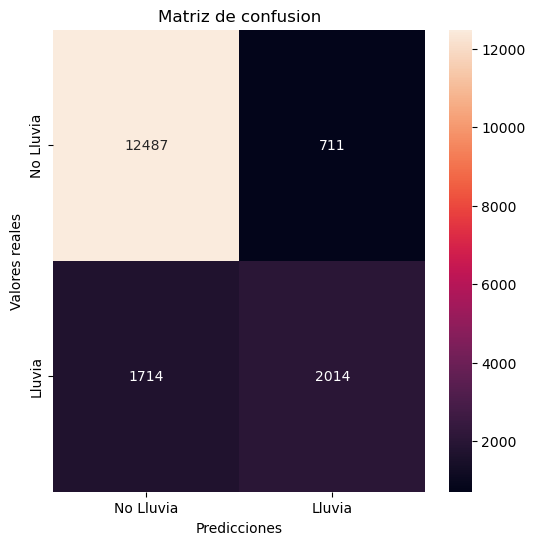

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13198
           1       0.74      0.54      0.62      3728

    accuracy                           0.86     16926
   macro avg       0.81      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



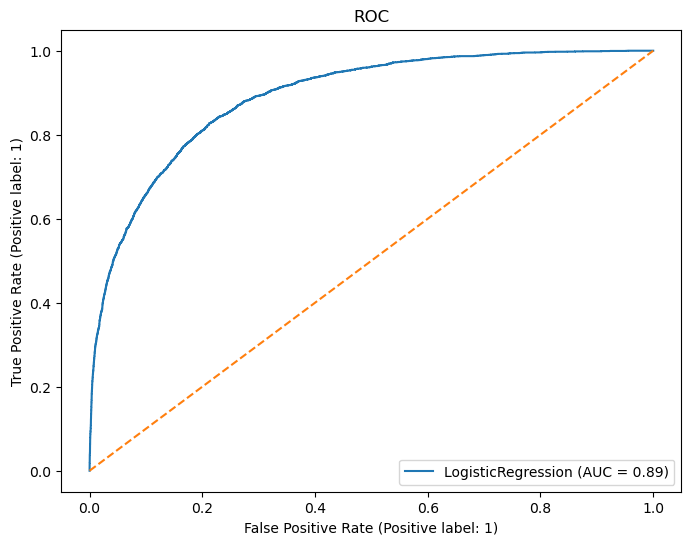

In [70]:
from sklearn.linear_model import LogisticRegression
modlog = LogisticRegression(max_iter = 10000)# para trabajar con datos desbalanceados en regresión logística class_weight='balanced'
modlog.fit(X_train_transf, y_train)
y_predlog = modlog.predict(X_test_transf)
mostrar_resultados(y_test, y_predlog, X_test_transf, modlog)

## SVM

In [82]:
from sklearn.svm import SVC #SVC: Clasificación y SVR:Regresión
from mlxtend.plotting import plot_decision_regions

svm = SVC(random_state = 2023)
svm.fit(X_train_transf, y_train)

SVC(random_state=2023)

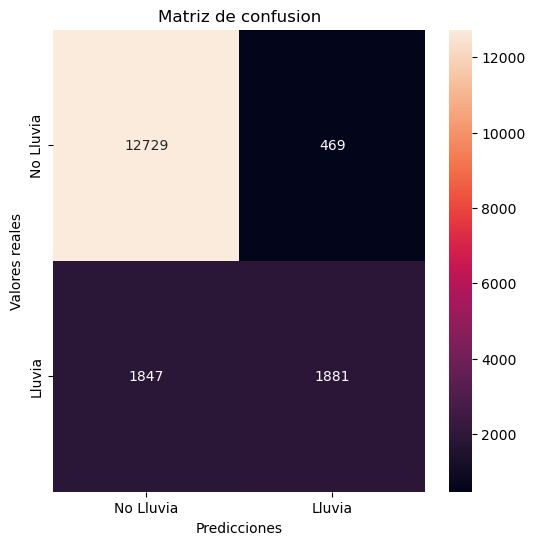

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     13198
           1       0.80      0.50      0.62      3728

    accuracy                           0.86     16926
   macro avg       0.84      0.73      0.77     16926
weighted avg       0.86      0.86      0.85     16926



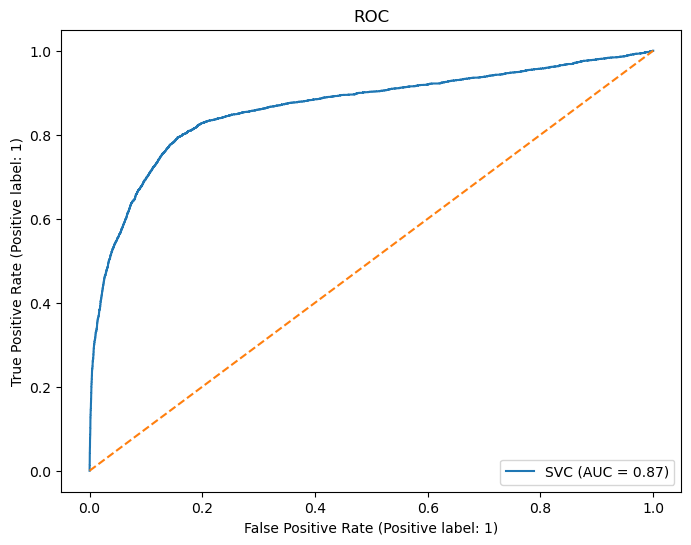

In [83]:
y_predsvm = svm.predict(X_test_transf)
mostrar_resultados(y_test, y_predsvm, X_test_transf, svm)

In [84]:
from sklearn.model_selection import GridSearchCV, KFold

hiperparametros = {"kernel" : ["rbf", "linear", "poly"],
                   "C": np.logspace(-4,1,15)}

configuraciones = KFold(n_splits = 5, shuffle=True, random_state=2023)
modelo = SVC(random_state = 2023)

modelos = GridSearchCV(
    estimator  = modelo, #modelo a optimizar
    param_grid = hiperparametros,# Hiperparámetros donde buscar
    cv         = configuraciones, #Configuación de la validación cruzada
    scoring    = 'roc_auc', #Buscamos optimizar el roc_auc
    n_jobs     = -1 , #Para utilizar todos los nucleos 
    verbose    = 1 # Para saber cuantos modelos estamos ajustando
)
modelos.fit(X_train_transf, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=SVC(random_state=2023), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.27584593e-04, 5.17947468e-04, 1.17876863e-03,
       2.68269580e-03, 6.10540230e-03, 1.38949549e-02, 3.16227766e-02,
       7.19685673e-02, 1.63789371e-01, 3.72759372e-01, 8.48342898e-01,
       1.93069773e+00, 4.39397056e+00, 1.00000000e+01]),
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='roc_auc', verbose=1)

In [85]:
print(modelos.best_params_)

{'C': 0.013894954943731374, 'kernel': 'linear'}


In [86]:
svm2 = modelos.best_estimator_.fit(X_train_transf, y_train) #SVC(kernel='linear',C=0.07196,random_state=2023)

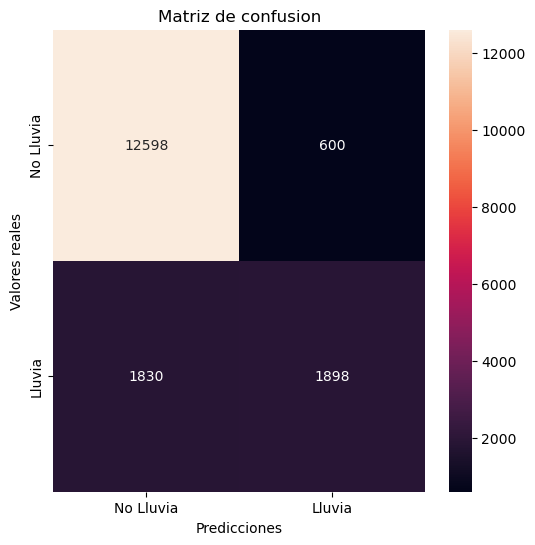

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13198
           1       0.76      0.51      0.61      3728

    accuracy                           0.86     16926
   macro avg       0.82      0.73      0.76     16926
weighted avg       0.85      0.86      0.85     16926



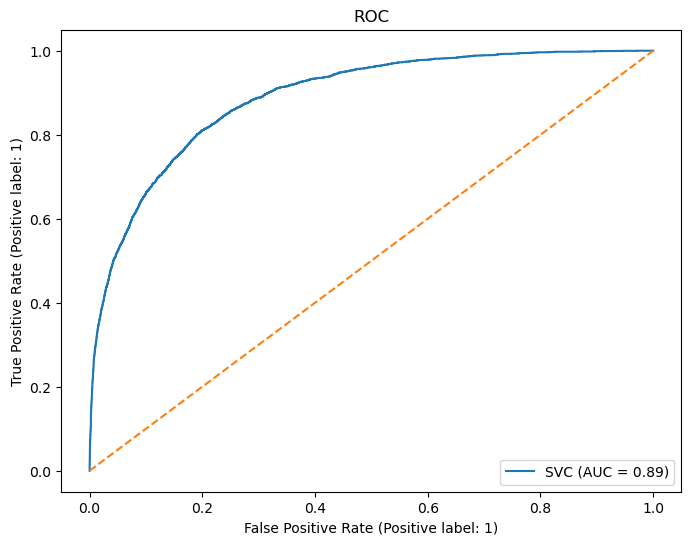

In [87]:
y_predsvm2 = svm2.predict(X_test_transf)
mostrar_resultados(y_test, y_predsvm2, X_test_transf, svm2)

## Arboles de decisión

In [72]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 2023)#.fit(X_train,y_train)
clf.fit(X_train_transf, y_train)

DecisionTreeClassifier(random_state=2023)

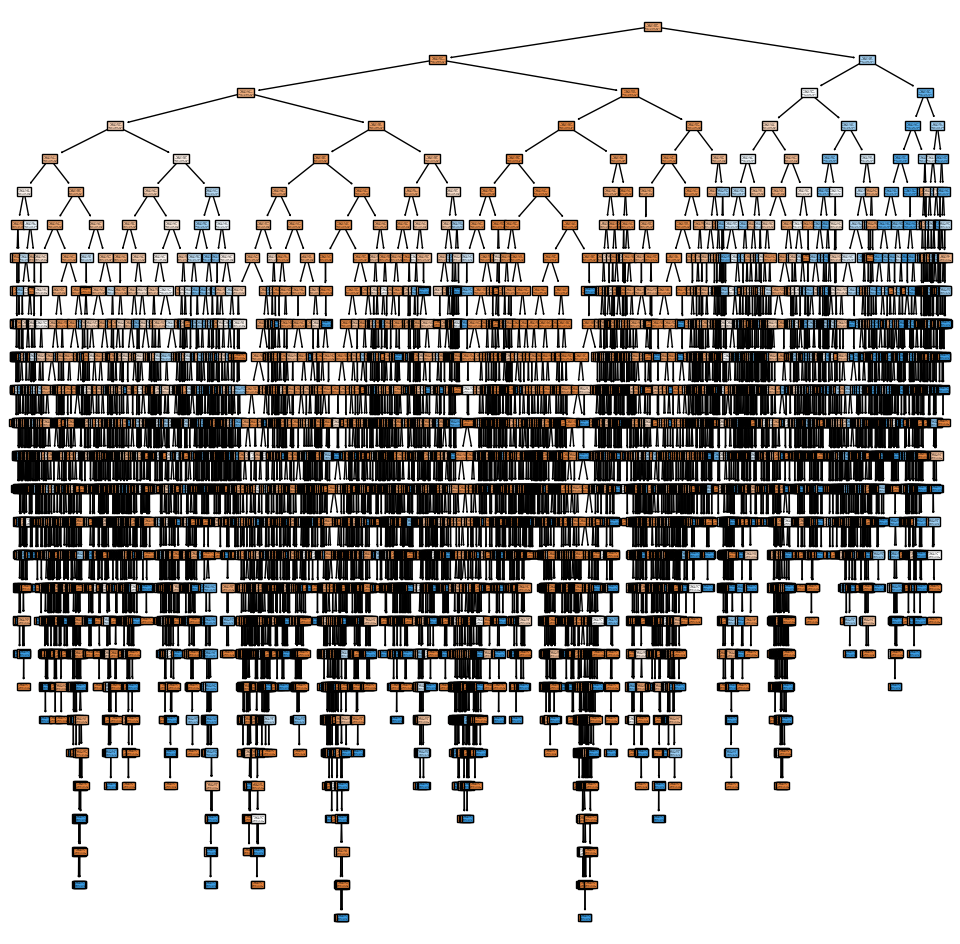

In [73]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(clf, filled = True, class_names = LABELS);

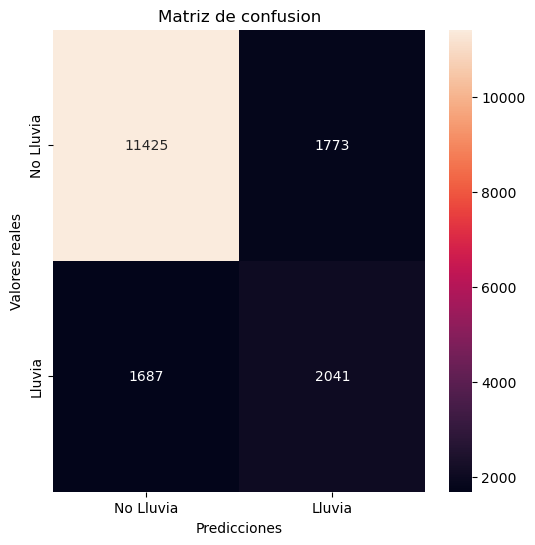

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     13198
           1       0.54      0.55      0.54      3728

    accuracy                           0.80     16926
   macro avg       0.70      0.71      0.70     16926
weighted avg       0.80      0.80      0.80     16926



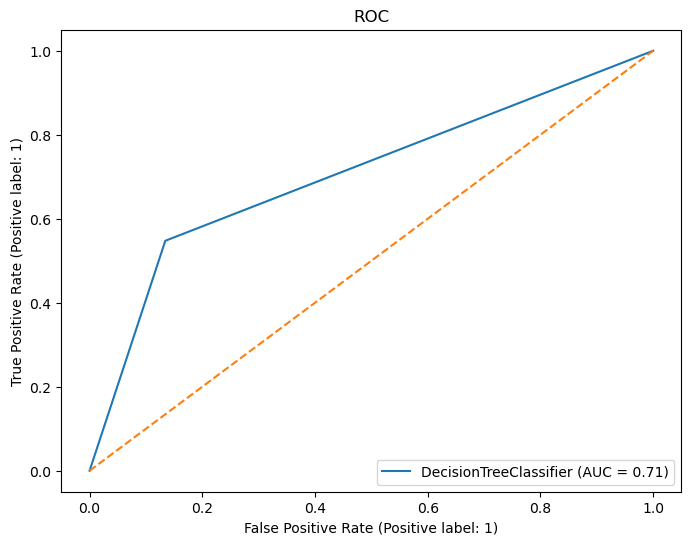

In [75]:
y_pred = clf.predict(X_test_transf)
mostrar_resultados(y_test, y_pred, X_test_transf, clf)

In [77]:
from sklearn.model_selection import GridSearchCV, KFold

hiperparametros = {'criterion': ['gini', 'entropy'],
                   'max_depth': np.arange(2, 10), #Profundidad del arbol
                   'ccp_alpha': np.logspace(-6, 1, 15), #Costo de complejidad
                   'min_samples_split': [2, 5, 10, 20, 50]#Observaciones minimas para la división
                   }

configuraciones= KFold(n_splits = 5, shuffle = True, random_state = 2023)
modelo = DecisionTreeClassifier(random_state = 2023)

modelos = GridSearchCV(
    estimator  = modelo,
    param_grid = hiperparametros,
    cv         = configuraciones,
    scoring    = 'roc_auc',
    n_jobs     = -1,
    verbose    = 1
)
modelos.fit(X_train_transf, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2023), n_jobs=-1,
             param_grid={'ccp_alpha': array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10, 20, 50]},
             scoring='roc_auc', verbose=1)

In [78]:
modelos.best_params_

{'ccp_alpha': 0.00031622776601683794,
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 50}

In [79]:
clf2 = modelos.best_estimator_
clf2.fit(X_train_transf, y_train)

DecisionTreeClassifier(ccp_alpha=0.00031622776601683794, criterion='entropy',
                       max_depth=8, min_samples_split=50, random_state=2023)

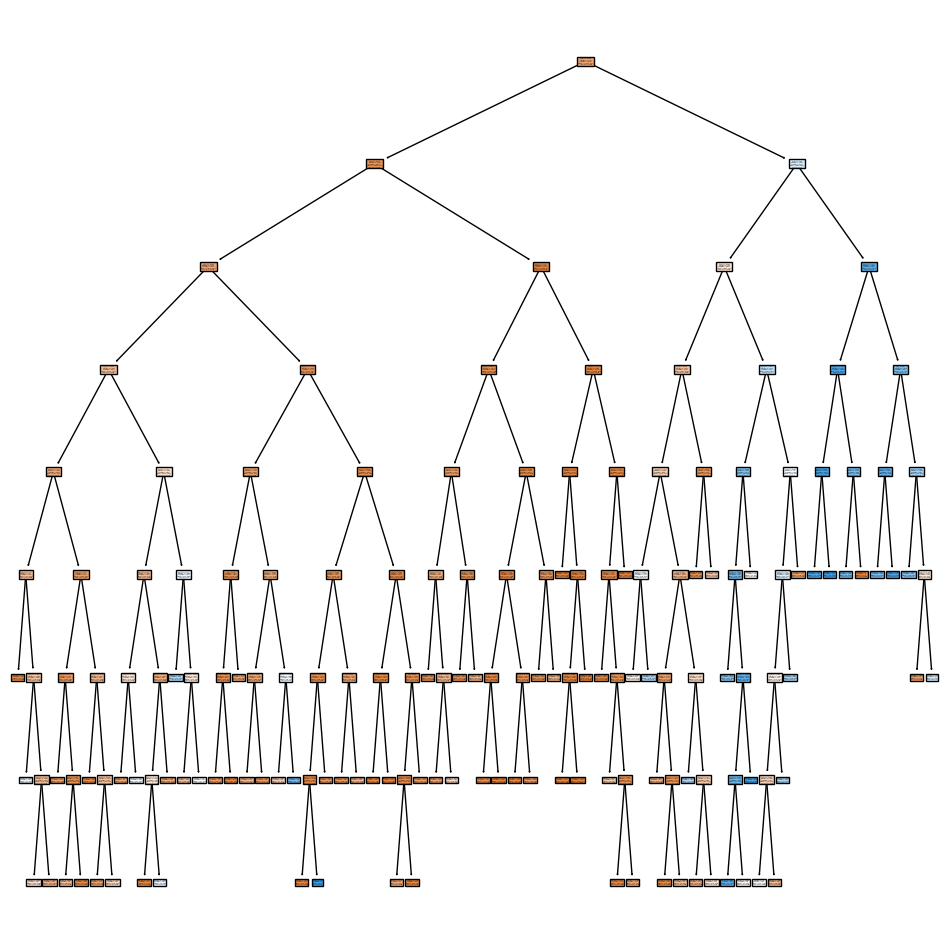

In [80]:
fig, ax = plt.subplots(figsize = (12,12))
plot_tree(clf2, filled = True, class_names = LABELS);

## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2023)
rf.fit(X_train_transf, y_train)

RandomForestClassifier(random_state=2023)

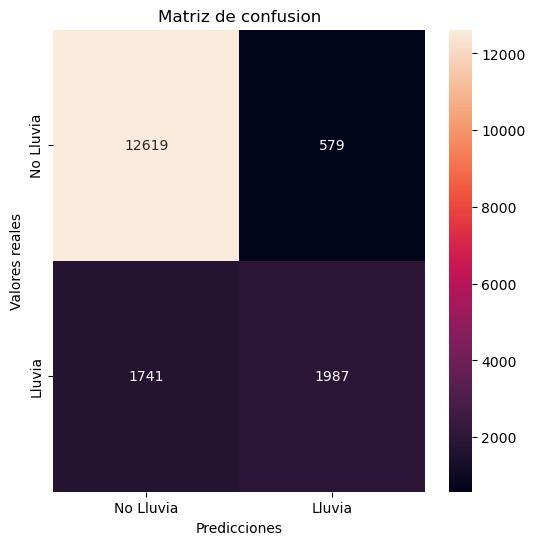

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     13198
           1       0.77      0.53      0.63      3728

    accuracy                           0.86     16926
   macro avg       0.83      0.74      0.77     16926
weighted avg       0.86      0.86      0.85     16926



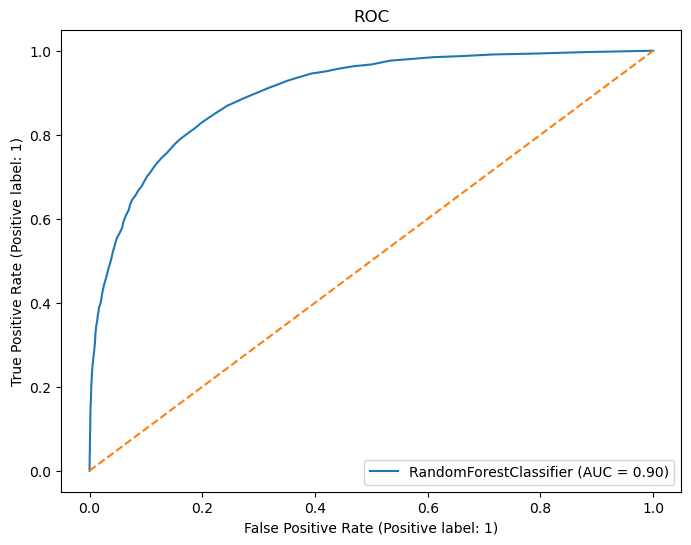

In [89]:
y_predrf = rf.predict(X_test_transf)
mostrar_resultados(y_test, y_predrf, X_test_transf, rf)

In [90]:
variables_imp = pd.Series(rf.feature_importances_,
                          index = X_train_transf.columns).sort_values(ascending=False)
variables_imp

Hum3pm                0.159409
Sol                   0.110153
Pre3pm                0.068604
Pres9am               0.062777
Nub3pm                0.060358
VelRafaga             0.056094
Hum9am                0.048747
Lluvia                0.047130
Temp3pm               0.046495
MinTemp               0.046156
Temp9am               0.044655
MaxTemp               0.044207
Evaporacion           0.040607
Vel3pm                0.034907
Vel9am                0.033696
Nub9am                0.030032
LluviaHoy_Yes         0.015367
LluviaHoy_No          0.012497
Koppen_Subtropical    0.007772
Koppen_Temperate      0.006125
Estacion_Primavera    0.006111
Estacion_Otoño        0.005778
Estacion_Verano       0.004779
Estacion_Invierno     0.004428
Koppen_Grassland      0.002230
Koppen_Desert         0.000886
dtype: float64

In [91]:
hiperparametros = {'n_estimators': [50,100,200], # Número de arboles
                   'max_features': [0.1,0.3,0.5,0.7,0.9], # Número de predictores muestreados para cada arbol en proporción
                   'min_samples_split': [2,5,10,20,50,100,200] #Observaciones minimas para la división
                   }
configuraciones = KFold(n_splits = 10, shuffle = True, random_state = 2023)
modelo = RandomForestClassifier(random_state = 2023)
modelos = GridSearchCV(
    estimator  = modelo,
    param_grid = hiperparametros,
    cv         = configuraciones,
    scoring    = 'roc_auc',
    n_jobs     = -1,
    verbose    = 1
)
modelos.fit(X_train_transf, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
             estimator=RandomForestClassifier(random_state=2023), n_jobs=-1,
             param_grid={'max_features': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'min_samples_split': [2, 5, 10, 20, 50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [92]:
modelos.best_params_

{'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 200}

In [93]:
rf2=modelos.best_estimator_
rf2.fit(X_train_transf,y_train)

RandomForestClassifier(max_features=0.3, n_estimators=200, random_state=2023)

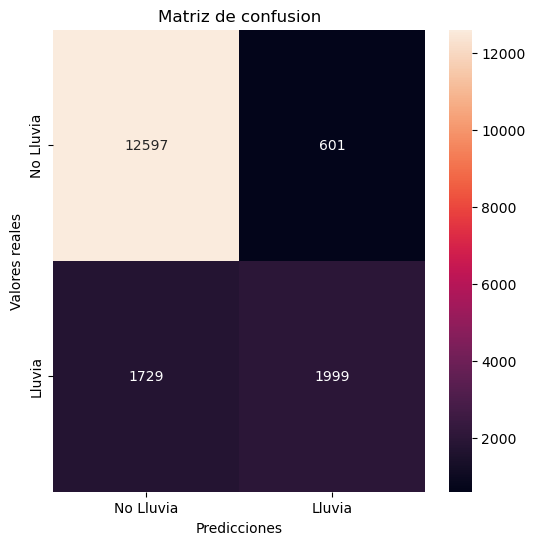

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     13198
           1       0.77      0.54      0.63      3728

    accuracy                           0.86     16926
   macro avg       0.82      0.75      0.77     16926
weighted avg       0.85      0.86      0.85     16926



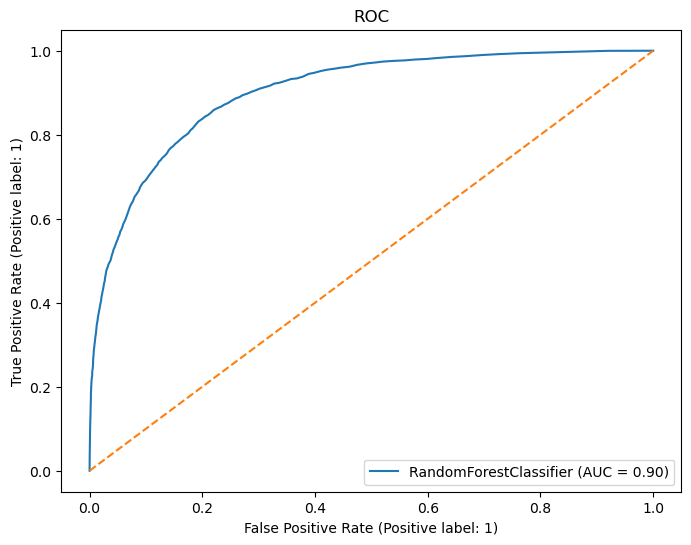

In [95]:
y_predrf = rf2.predict(X_test_transf)
mostrar_resultados(y_test, y_predrf, X_test_transf, rf2)